In [1]:
import sys
print(sys.version)

import os
print(os.getcwd())

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
C:\Users\abuchake\Downloads


In [2]:
import pandas as pd
import time
print("pandas imported as pd")
import numpy as np
print("numpy imported as np")
import matplotlib
import matplotlib.pyplot as mp
print("matplotlib imported")
time.ctime()

pandas imported as pd
numpy imported as np
matplotlib imported


'Sat Dec  9 19:46:28 2023'

In [3]:
# Reading the .csv file.
dmart_snacks=pd.read_csv('C:/Users/abuchake/dmart_snacks.csv')

#info command dispalys the basic information about the dataset. 
dmart_snacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Grocery_Name    1120 non-null   object
 1   MRP_Price       1120 non-null   int64 
 2   Discount_Price  1120 non-null   int64 
 3   Quantity        1120 non-null   object
 4   brand_name      1120 non-null   object
 5   price_per_unit  1120 non-null   object
dtypes: int64(2), object(4)
memory usage: 52.6+ KB


In [4]:
print("dmart_snacks_columns:",dmart_snacks.columns)
print('Total columns in Dataset:',len(dmart_snacks.columns))
print('Shape of current dataset:',dmart_snacks.shape)

dmart_snacks_columns: Index(['Grocery_Name', 'MRP_Price', 'Discount_Price', 'Quantity', 'brand_name',
       'price_per_unit'],
      dtype='object')
Total columns in Dataset: 6
Shape of current dataset: (1120, 6)


In [5]:
print("Top 5 recs:")
print(dmart_snacks.head(5))
print("Last 5 recs:")
dmart_snacks.tail(5)

Top 5 recs:
                                        Grocery_Name  MRP_Price  \
0        Britannia Good Day Cashew Cookies : 600 gms        135   
1  Parle Hide & Seek Chocolate Chip Cookies : 350...        150   
2                 Karachi's Fruit Biscuits : 400 gms        170   
3         Parle Nutricrunch Digestive Cookies : 1 kg        270   
4      Sunfeast Dark Fantasy Yumfills Cake : 242 gms        170   

   Discount_Price Quantity brand_name price_per_unit  
0              99   600 gm  Britannia         ₹ 0.17  
1              99   350 gm      Parle         ₹ 0.28  
2             125   400 gm  Karachi's         ₹ 0.31  
3             135     1 kg      Parle       ₹ 135.00  
4              78   242 gm   Sunfeast         ₹ 0.32  
Last 5 recs:


,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit
1115,The Baker's Dozen Fresh Orange Cake With Pista...,165,82,150 gm,The,₹ 0.55
1116,Britannia Treat Vanilla Creme Wafers : 55 gms,50,25,55 gm,Britannia,₹ 0.45
1117,Ribbons & Balloons Winny Golden Sponge - Vanil...,10,8,25 gm,Ribbons,₹ 0.32
1118,Ribbons & Balloons Winny Choco Sponge : 25 gms,10,9,25 gm,Ribbons,₹ 0.36
1119,Britannia Fudge It Chocolate Brownie : 40 gms,20,18,40 gm,Britannia,₹ 0.45


In [6]:
dmart_snacks.describe(include='all')

,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit
count,1120,1120.000000,1120.000000,1120,1120,1120
unique,1120,NaN,NaN,230,247,231
top,Britannia Good Day Cashew Cookies : 600 gms,NaN,NaN,200 gm,Cadbury,₹ 0.32
freq,1,NaN,NaN,101,40,31
mean,NaN,168.433929,113.686607,NaN,NaN,NaN
std,NaN,243.429924,144.255003,NaN,NaN,NaN
min,NaN,10.000000,5.000000,NaN,NaN,NaN
25%,NaN,60.000000,40.000000,NaN,NaN,NaN
50%,NaN,109.000000,75.000000,NaN,NaN,NaN
75%,NaN,195.750000,134.000000,NaN,NaN,NaN


In [7]:
# By checking the price_per_unit we get to know that it has rupees sign init.We would have to replace it and convert it to float
print('price_per_unit_before:',dmart_snacks.price_per_unit)
dmart_snacks['price_per_unit'] = dmart_snacks['price_per_unit'].str.replace('₹', '')
dmart_snacks['price_per_unit'] = dmart_snacks.price_per_unit.astype(float)
dmart_snacks.price_per_unit

price_per_unit_before: 0         ₹ 0.17
1         ₹ 0.28
2         ₹ 0.31
3       ₹ 135.00
4         ₹ 0.32
          ...   
1115      ₹ 0.55
1116      ₹ 0.45
1117      ₹ 0.32
1118      ₹ 0.36
1119      ₹ 0.45
Name: price_per_unit, Length: 1120, dtype: object


0         0.17
1         0.28
2         0.31
3       135.00
4         0.32
         ...  
1115      0.55
1116      0.45
1117      0.32
1118      0.36
1119      0.45
Name: price_per_unit, Length: 1120, dtype: float64

,MRP_Price,Discount_Price,price_per_unit
MRP_Price,1.000000,0.947302,0.320058
Discount_Price,0.947302,1.000000,0.404651
price_per_unit,0.320058,0.404651,1.000000


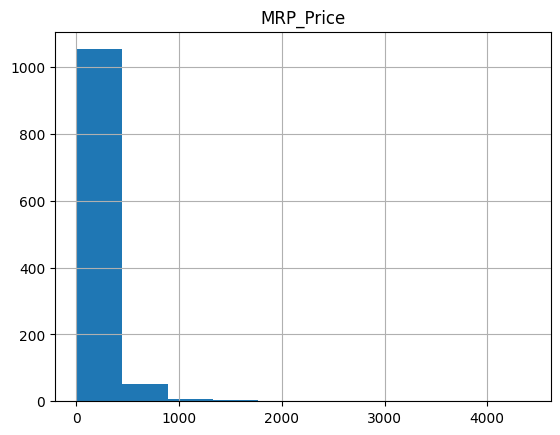

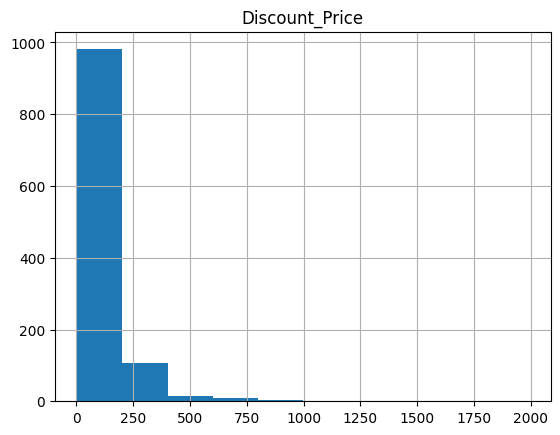

In [8]:
#Need to convert MRP_Price and Discount_Price in float
dmart_snacks['MRP_Price'] = dmart_snacks.MRP_Price.astype(float)
dmart_snacks['Discount_Price'] = dmart_snacks.Discount_Price.astype(float)
dmart_snacks.hist('MRP_Price')
dmart_snacks.hist('Discount_Price')
corr = dmart_snacks.corr(numeric_only = True)
corr

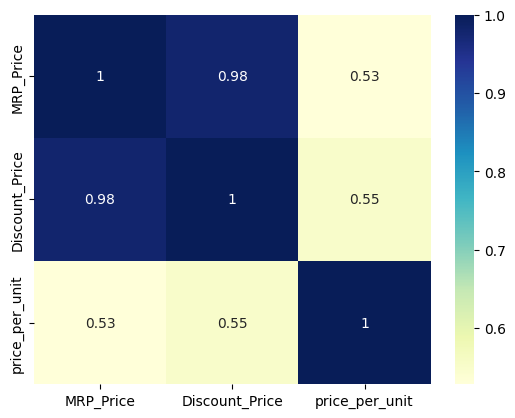

In [9]:
import seaborn as sb 
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show()

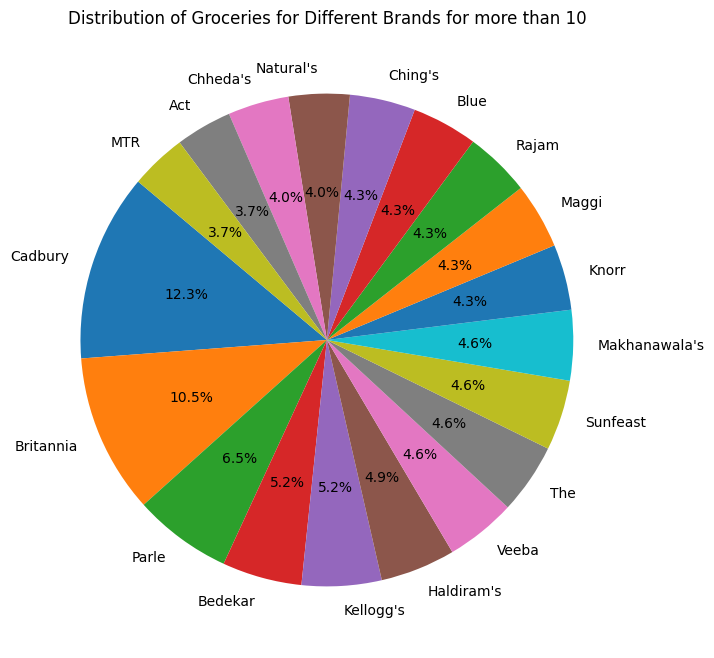

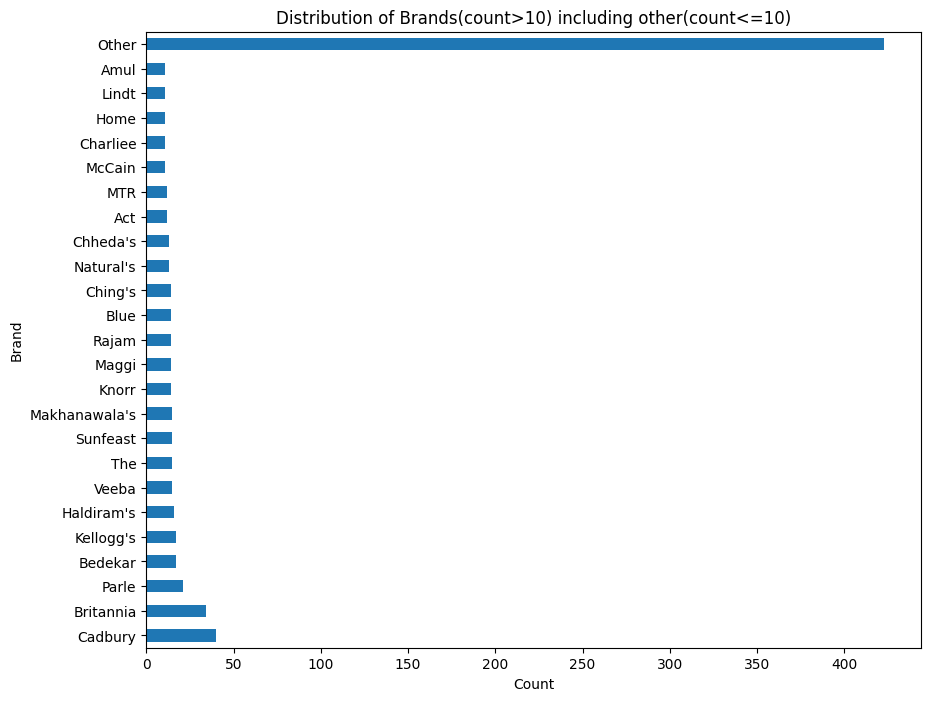

In [9]:
brand_counts = dmart_snacks["brand_name"].value_counts()
brand_count_morethan10 = brand_counts[brand_counts > 11]

brand_counts['Other'] = brand_counts[brand_counts <= 5].sum()

brand_count_morethan5 = brand_counts[brand_counts > 10]

# Plotting the pie chart
mp.figure(figsize=(10, 8))
mp.pie(brand_count_morethan10, labels=brand_count_morethan10.index, autopct='%1.1f%%', startangle=140)
mp.title('Distribution of Groceries for Different Brands for more than 10')
mp.show()

mp.figure(figsize=(10, 8))
brand_count_morethan5.plot(kind='barh')
mp.title('Distribution of Brands(count>10) including other(count<=10)')
mp.xlabel('Count')
mp.ylabel('Brand')
mp.show()

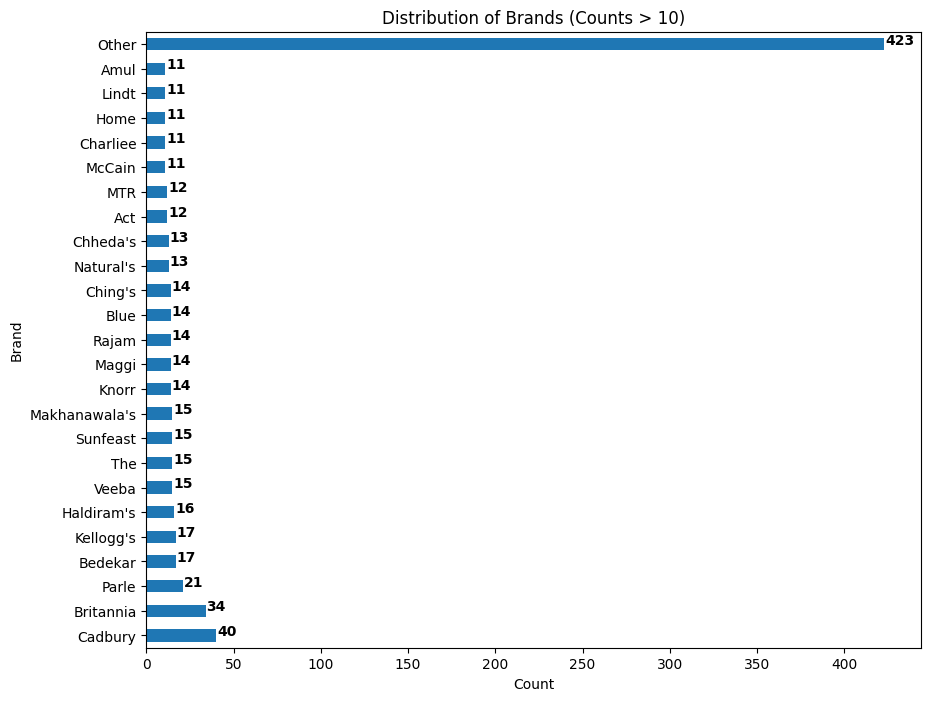

In [10]:
# This is to add count infront of bars to give actual counts for each Brancd in dataset. Others bar has Brands which has count less than 10
mp.figure(figsize=(10, 8))
ax = brand_count_morethan5.plot(kind='barh')

# Add count values on top of each bar
for i, v in enumerate(brand_count_morethan5):
    ax.text(v + 0.5, i, str(v), color='black', fontweight='bold')

mp.title('Distribution of Brands (Counts > 10)')
mp.xlabel('Count')
mp.ylabel('Brand')
mp.show()

In [19]:
Diff = dmart_snacks.MRP_Price - dmart_snacks.Discount_Price
Diff_per = ((Diff/dmart_snacks.MRP_Price)*100)
print("MRP:",dmart_snacks.MRP_Price,"Dis_price:",dmart_snacks.Discount_Price,"Diff:",Diff,"perc dis:",Diff_per)

MRP: 0      570.0
1      570.0
2      600.0
3      600.0
4      335.0
       ...  
241    300.0
242    288.0
243     70.0
244     20.0
245    165.0
Name: MRP_Price, Length: 246, dtype: float64 Dis_price: 0      479.0
1      500.0
2      449.0
3      430.0
4      265.0
       ...  
241    150.0
242    249.0
243     50.0
244     13.0
245    140.0
Name: Discount_Price, Length: 246, dtype: float64 Diff: 0       91.0
1       70.0
2      151.0
3      170.0
4       70.0
       ...  
241    150.0
242     39.0
243     20.0
244      7.0
245     25.0
Length: 246, dtype: float64 perc dis: 0      15.964912
1      12.280702
2      25.166667
3      28.333333
4      20.895522
         ...    
241    50.000000
242    13.541667
243    28.571429
244    35.000000
245    15.151515
Length: 246, dtype: float64


In [11]:
dmart_snacks["Total Disc"] = Diff
dmart_snacks["Percetage Disc"] = Diff_per

NameError: name 'Diff' is not defined

In [21]:
dmart_snacks

,Grocery_Name,MRP_Price,Discount_Price,Quantity,brand_name,price_per_unit,Total Disc,Percetage Disc
0,Wagh Bakri Premium Leaf Tea Pouch : 1 kg,570.0,479.0,1 kg,Wagh,479.00,91.0,15.964912
1,Society Tea : 1 kg,570.0,500.0,1 kg,Society,500.00,70.0,12.280702
2,Brooke Bond Red Label Natural Care Tea : 1 kg,600.0,449.0,1 kg,Brooke,449.00,151.0,25.166667
3,Brooke Bond Red Label Tea : 1 kg,600.0,430.0,1 kg,Brooke,430.00,170.0,28.333333
4,Tata Tea Agni : 1.5 kgs,335.0,265.0,1.5 kg,Tata,176.67,70.0,20.895522
...,...,...,...,...,...,...,...,...
241,Rasna Insta Mango Powder : 750 gms,300.0,150.0,750 gm,Rasna,0.20,150.0,50.000000
242,Bisleri Packaged Drinking Water : 250 ml x 48 ...,288.0,249.0,250 ml x 48U,Bisleri,0.20,39.0,13.541667
243,Bisleri Packaged Drinking Water : 5 Litres,70.0,50.0,5 L,Bisleri,10.00,20.0,28.571429
244,Bisleri Water : 1 Litre,20.0,13.0,1 L,Bisleri,13.00,7.0,35.000000


In [22]:
dmart_snacks['Percetage Disc'] = dmart_snacks['Percetage Disc'].round(2)

In [23]:
dmart_snacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Grocery_Name    246 non-null    object 
 1   MRP_Price       246 non-null    float64
 2   Discount_Price  246 non-null    float64
 3   Quantity        246 non-null    object 
 4   brand_name      246 non-null    object 
 5   price_per_unit  246 non-null    float64
 6   Total Disc      246 non-null    float64
 7   Percetage Disc  246 non-null    float64
dtypes: float64(5), object(3)
memory usage: 15.5+ KB


In [26]:
dmart_snacks.to_csv('dmart_snacks_clean.csv',index=False)